## 9.3 Combining and Differencing
### 9.3.1 Normalized Difference Vegetation Index

In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np, numpy.ma as ma

In [2]:
# Import veggie channel (ABI Channel 3)
fname = 'data/goes-meso/ndvi/OR_ABI-L1b-RadM1-M6C03_G16_s20192091147504_e20192091147562_c20192091148025.nc'
goesnc = Dataset(fname, 'r')
veggie = goesnc.variables['Rad'][:]

# Import red channel (ABI Channel 2)
fname = 'data/goes-meso/ndvi/OR_ABI-L1b-RadM1-M6C02_G16_s20192091147504_e20192091147562_c20192091147599.nc'
goesnc = Dataset(fname, 'r')
red = goesnc.variables['Rad'][:]

In [3]:
red = red[::2, ::2]

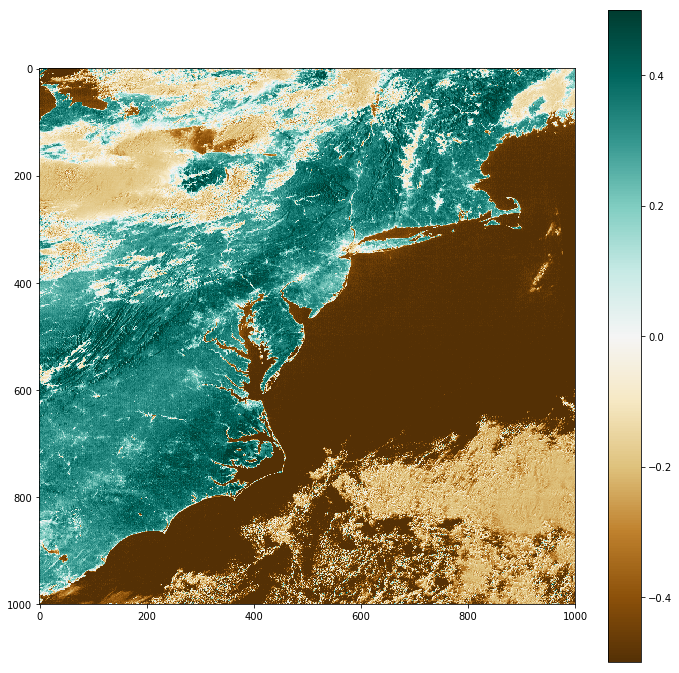

In [4]:
img = (veggie-red)/(veggie+red)

plt.figure(figsize=[12,12])
plt.imshow(img, vmin=-0.5, vmax=0.5, cmap=plt.get_cmap("BrBG"))
plt.colorbar()
plt.show()

In [5]:
fname = 'data/goes-meso/ndvi/OR_ABI-L2-ACMM1-M6_G16_s20192091147504_e20192091147562_c20192091148155.nc'
goesnc = Dataset(fname, 'r')
cloud_mask = goesnc.variables['BCM'][:]

In [6]:
cloud_mask_big = np.repeat(np.repeat(cloud_mask, 2, axis=1), 2, axis=0)

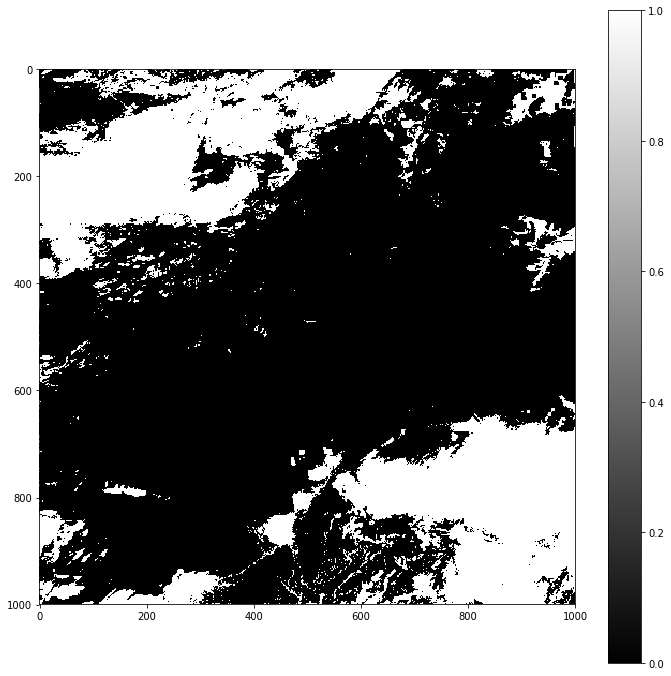

In [7]:
plt.figure(figsize=[12,12])
plt.imshow(cloud_mask_big, cmap=plt.get_cmap("binary_r"))
plt.colorbar()
plt.show()

In [8]:
imgMasked = ma.masked_array(img, mask=cloud_mask_big, fill_value=0)

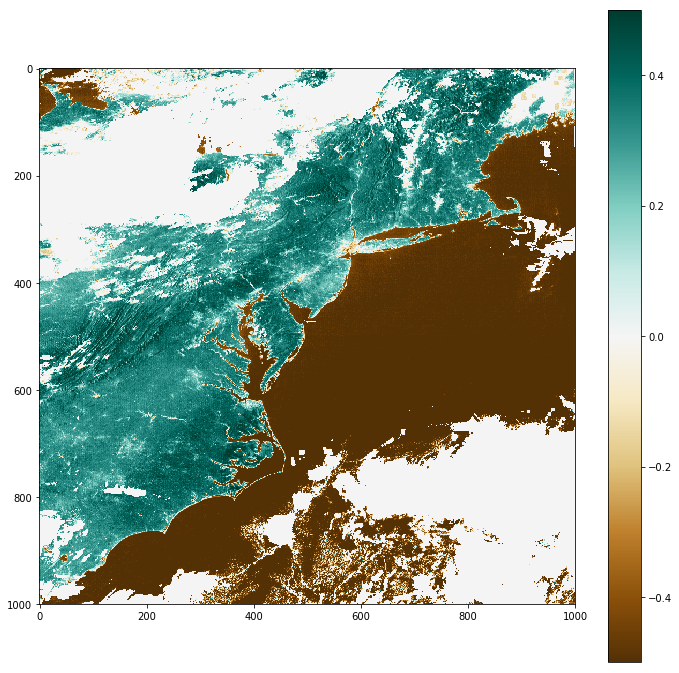

In [9]:
plt.figure(figsize=[12,12])
plt.imshow(ma.filled(imgMasked), vmin=-0.5, vmax=0.5, cmap=plt.get_cmap("BrBG"))
plt.colorbar()
plt.show()

### 9.3.2 GOES-16 Sandwich Product

In [10]:
# Import veggie channel (ABI Channel 13, 10.3)
fname = "data/goes-meso/michael/OR_ABI-L1b-RadM1-M3C13_G16_s20182822019282_e20182822019350_c20182822019384.nc"
g16nc = Dataset(fname, 'r')
C13 = g16nc.variables['Rad'][:]

# Import red channel (ABI Channel 2, .64)
fname = "data/goes-meso/michael/OR_ABI-L1b-RadM1-M3C02_G16_s20182822019282_e20182822019339_c20182822019374.nc"
g16nc = Dataset(fname, 'r')
C02 = g16nc.variables['Rad'][:]
C02 = C02[::4, ::4]

sandwich = C02 - C13

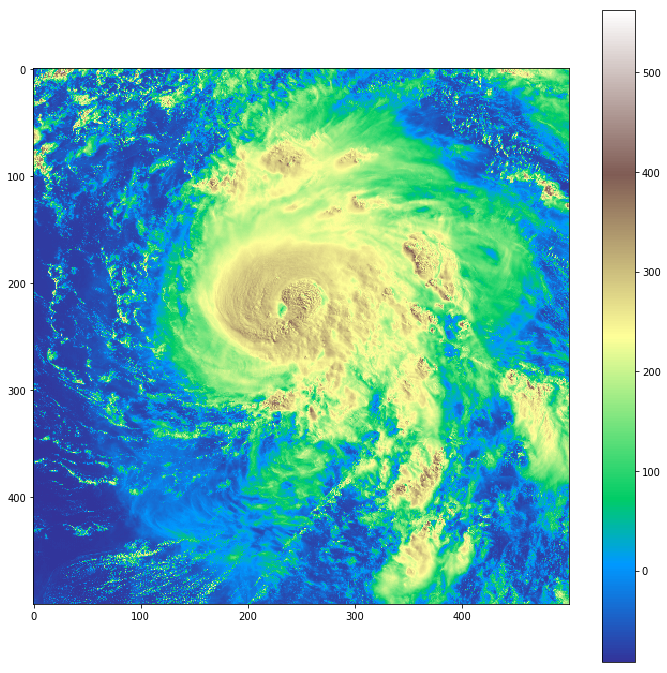

In [11]:
plt.figure(figsize=[12,12])
plt.imshow(sandwich, cmap=plt.get_cmap("terrain"))
plt.colorbar()
plt.show()

## 9.4 RGB

In [12]:
from skimage.exposure import adjust_gamma, rescale_intensity

In [13]:
# Import blue channel (ABI Channel 1)
fname = 'data/goes-meso/fires/OR_ABI-L1b-RadM2-M6C01_G17_s20191501801013_e20191501801070_c20191501801105.nc'
g17nc = Dataset(fname, 'r')
refl = g17nc.variables['Rad'][:]
blue = adjust_gamma(refl, 0.5)

# Import veggie channel (ABI Channel 3)
fname = 'data/goes-meso/fires/OR_ABI-L1b-RadM2-M6C03_G17_s20191501801013_e20191501801070_c20191501801103.nc'
g17nc = Dataset(fname, 'r')
refl = g17nc.variables['Rad'][:]
veggie = adjust_gamma(refl, 0.5)

In [14]:
# Import red channel (ABI Channel 2)
fname = 'data/goes-meso/fires/OR_ABI-L1b-RadM2-M6C02_G17_s20191501801013_e20191501801070_c20191501801097.nc'
g17nc = Dataset(fname, 'r')
refl = g17nc.variables['Rad'][:]
refl = refl[::2, ::2]
red = adjust_gamma(refl, 0.5)

In [15]:
green = 0.45*red + 0.45*blue + 0.1*veggie

In [16]:
r = ma.filled(red, fill_value=0)
g = ma.filled(green, fill_value=0)
b = ma.filled(blue, fill_value=0)

rgb = np.stack([r, g, b], axis=2)

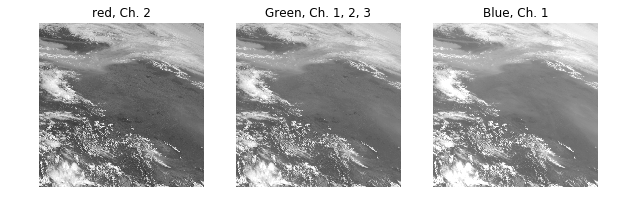

In [17]:
fig = plt.figure(figsize=[10,10])

ax1 = plt.subplot(131)
ax1.imshow(r, vmin=0, vmax=20, cmap='gray')
ax1.set_title("red, Ch. 2")

ax2 = plt.subplot(132)
ax2.imshow(g, vmin=0, vmax=20, cmap='gray')
ax2.set_title("Green, Ch. 1, 2, 3")

ax3 = plt.subplot(133)
ax3.imshow(b, vmin=0, vmax=20, cmap='gray')
ax3.set_title("Blue, Ch. 1")

[ax.set_axis_off() for ax in [ax1, ax2, ax3]]

plt.show()

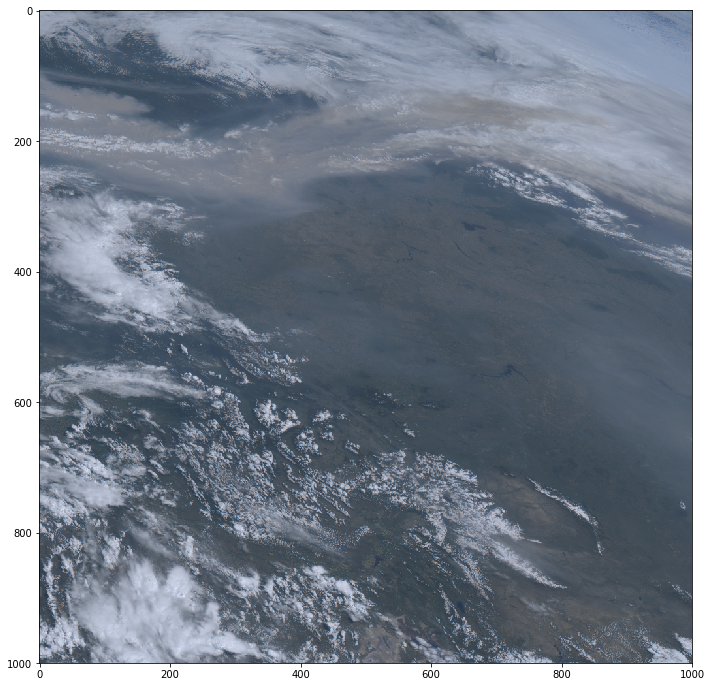

In [18]:
# Normalize values to 1
plt.figure(figsize=[12,12])
rgb255 = rescale_intensity(rgb, in_range=(0, 25.5), out_range=(0, 1.0))
plt.imshow(rgb255)
plt.show()

### 9.4.2 Dust RGB

In [19]:
fname = 'data/goes-meso/fires/OR_ABI-L1b-RadM2-M6C11_G17_s20191501801013_e20191501801070_c20191501801110.nc'
g17nc = Dataset(fname, 'r')
btC11 = g17nc.variables['Rad'][:]

fname = 'data/goes-meso/fires/OR_ABI-L1b-RadM2-M6C14_G17_s20191501801013_e20191501801070_c20191501801113.nc'
g17nc = Dataset(fname, 'r')
btC14 = g17nc.variables['Rad'][:]

fname = 'data/goes-meso/fires/OR_ABI-L1b-RadM2-M6C15_G17_s20191501801013_e20191501801076_c20191501801112.nc'
g17nc = Dataset(fname, 'r')
btC15 = g17nc.variables['Rad'][:]

In [20]:
img = btC15-btC14
# Rescale and adjust gamma
img = rescale_intensity(img, out_range=(0, 1))
red = adjust_gamma(img, 1.0)

img = btC14-btC11
# Rescale and adjust gamma
img = rescale_intensity(img, out_range=(0, 1))
green = adjust_gamma(img, 2.5)

img = btC14
# Rescale and adjust gamma
img = rescale_intensity(img, out_range=(0, 1))
blue = adjust_gamma(img, 1.0)

In [21]:
r = ma.filled(red, fill_value=0)
g = ma.filled(green, fill_value=0)
b = ma.filled(blue, fill_value=0)

rgb = np.stack([r, g, b], axis=2)

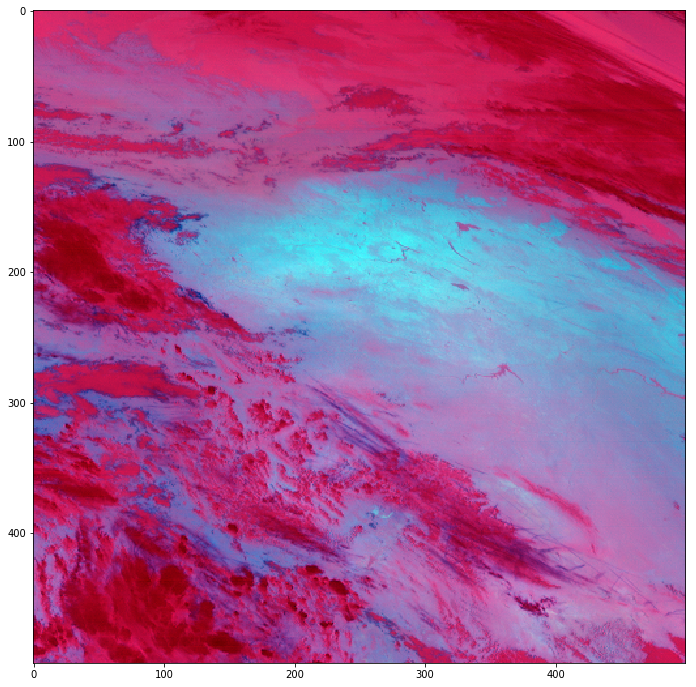

In [22]:
plt.figure(figsize=[12,12])
plt.imshow(rgb)
plt.show()

### 9.4.3 Fire/Natural RGB

In [23]:
fname = 'data/goes-meso/fires/OR_ABI-L1b-RadM2-M6C05_G17_s20191501801013_e20191501801070_c20191501801105.nc'
g17nc = Dataset(fname, 'r')
img = g17nc.variables['Rad'][:]
red = rescale_intensity(img, out_range=(0, 1))

fname = 'data/goes-meso/fires/OR_ABI-L1b-RadM2-M6C03_G17_s20191501801013_e20191501801070_c20191501801103.nc'
g17nc = Dataset(fname, 'r')
img = g17nc.variables['Rad'][:]
green = rescale_intensity(img, out_range=(0, 1))

fname = 'data/goes-meso/fires/OR_ABI-L1b-RadM2-M6C02_G17_s20191501801013_e20191501801070_c20191501801097.nc'
g17nc = Dataset(fname, 'r')
img = g17nc.variables['Rad'][:]
img = img[::2, ::2]
blue = rescale_intensity(img, out_range=(0, 1))

In [24]:
r = ma.filled(red, fill_value=0)
g = ma.filled(green, fill_value=0)   
b = ma.filled(blue, fill_value=0)

rgb = np.stack([r, g, b], axis=2)

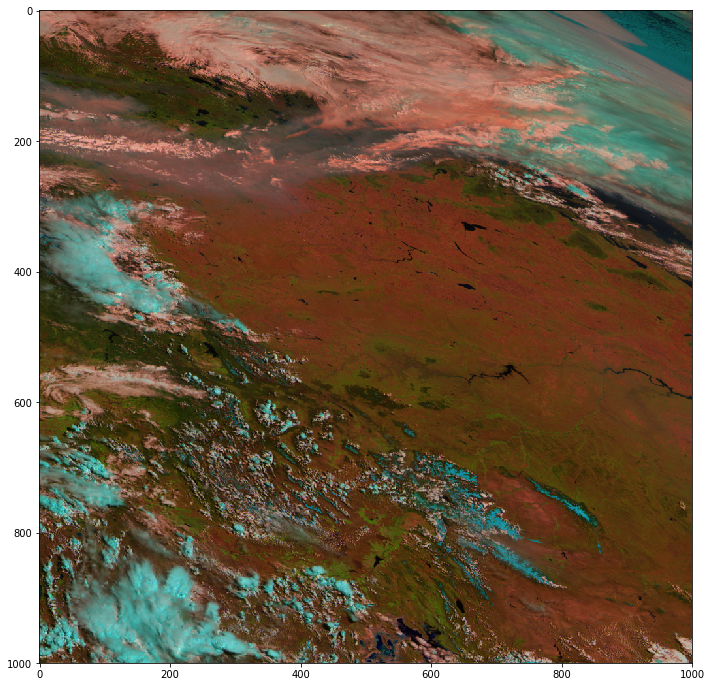

In [25]:
plt.figure(figsize=[12,12])
plt.imshow(rgb)
plt.show()

## 9.5 Matching with Surface Observations

In [26]:
import cartopy.crs as ccrs

fname = 'data/goes-meso/matchup/OR_ABI-L2-DSRM1-M6_G16_s20192091300534_e20192091300591_c20192091303116.nc'
goes = Dataset(fname, 'r')
dsr = goes.variables['DSR'][:]
lat = goes.variables['lat'][:]
lon = goes.variables['lon'][:]

x,y = np.meshgrid(lon, lat)

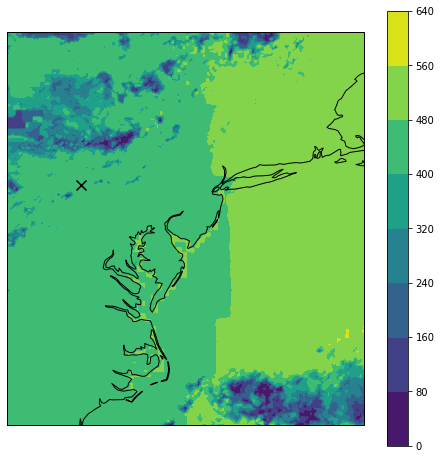

In [27]:
plt.figure(figsize=[8,8])

ax=plt.axes(projection=ccrs.PlateCarree())
ax.coastlines('50m')

plt.contourf(x, y, dsr)
plt.colorbar()

plt.scatter(-77.93, 40.72, marker='x', c='black', s=100)
ax.set_ylim(34, 45)
ax.set_xlim(-80, -70)

plt.show()

In [28]:
def haversine(deglat1, deglon1, deglat2, deglon2):
    lat1=deglat1*np.pi/180.0
    lat2=deglat2*np.pi/180.0
    
    long1=deglon1*np.pi/180.0
    long2=deglon2*np.pi/180.0
      
    a = np.sin(0.5 * (lat2 - lat1))
    b = np.sin(0.5 * (long2 - long1))
    
    dist = 12742.0 * np.arcsin(np.sqrt(a * a + np.cos(lat1) * np.cos(lat2) * b * b))
    
    return dist

In [29]:
def matchup_spatial(latitude, longitude, site_lat, site_lon, radius_km=50.0):
    # Find index for pixels within radius_km around ground site  
    distance_matrix = np.full(latitude.shape,  radius_km + 1)

    mask = np.sqrt( (np.array(latitude) - site_lat)**2 + (np.array(longitude) - site_lon)**2 )
    index = (mask < 1.0)
    
    # Replace angle distance with km distance
    distance_matrix[index] = haversine(site_lat, site_lon, latitude[index], longitude[index])
    mask = (distance_matrix > radius_km)
    
    # Return a single (closest) value
#     if len(keep_index[keep_index==True]) > 0:
#         keep_index = (distance_matrix == distance_matrix.min())
   
    return mask

In [30]:
mask = matchup_spatial(y, x, 40.72, -77.93, radius_km=100.0)

In [31]:
dsrMA = np.ma.masked_array(dsr, mask=mask, fill_value=0)
xMA = np.ma.masked_array(x, mask=mask, fill_value=0)
yMA = np.ma.masked_array(y, mask=mask, fill_value=0)

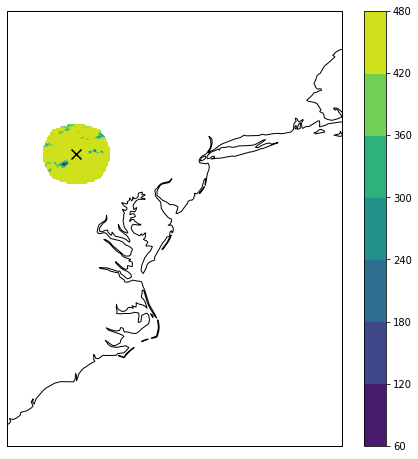

In [32]:
plt.figure(figsize=[8,8])
ax=plt.axes(projection=ccrs.PlateCarree())
ax.coastlines('50m')
plt.contourf(xMA, yMA, dsrMA)
plt.colorbar()
plt.scatter(-77.93, 40.72, marker='x', c='black', s=100)

ax.set_ylim(32, 45)
ax.set_xlim(-80, -70)

plt.show()

In [33]:
import pandas as pd

fname = 'data/goes-meso/matchup/surfrad_header.txt'
header = pd.read_csv(fname)

fname = 'data/goes-meso/matchup/psu19209.dat'
ground = pd.read_csv(fname, skipinitialspace=True, delim_whitespace=True, \
             skiprows=2, header=None, names=list(header))

In [34]:
# Surface obs time
df = pd.DataFrame({'year': ground['year'], 'month': ground['month'], 'day': ground['day'], \
                  'hour': ground['hour'], 'minute' : ground['min']})

In [35]:
# List of ground observation times
ground['Datetime'] = pd.to_datetime(df)

# Satellite observaton time
fmt = '%Y-%m-%dT%H:%M'
fileTime = pd.to_datetime(goes.time_coverage_start[0:19], format=fmt)

In [36]:
def matchup_temporal(time, time_array, matchup_max_time_mins=15):
    time_diff = [np.abs(x - time) for x in time_array]
    index = np.argmin(time_diff)
    
    if abs(time_array[index] - time) < pd.Timedelta(minutes=15):
        return index
    else:
        return -1

In [37]:
index = matchup_temporal(fileTime, ground['Datetime'] )
print(index)

781


In [38]:
ground['dw_solar'][index] - dsrMA.mean()

25.645798230834032